In [35]:
# Step 1 - Install & Import Required Libraries

!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm plotly --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

In [38]:
# Step 2 - Load Dataset

df = pd.read_csv('Dataset.csv')
print("Dataset Shape:", df.shape)
df.head(20)

Dataset Shape: (10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [39]:
# Step 3 - Data Cleaning

# Drop duplicates
df = df.drop_duplicates()
# Check missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [40]:
# Step 4 - Encode Categorical Columns

# Encode 'Type' column (M=0, L=1, H=2)
df['Type'] = df['Type'].map({'M':0, 'L':1, 'H':2})

In [41]:
# Step 5 - Feature Scaling & Engineering

target = 'Machine failure'
# Drop identifier columns: UDI, Product ID
X = df.drop([target, 'UDI', 'Product ID'], axis=1)
y = df[target]
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

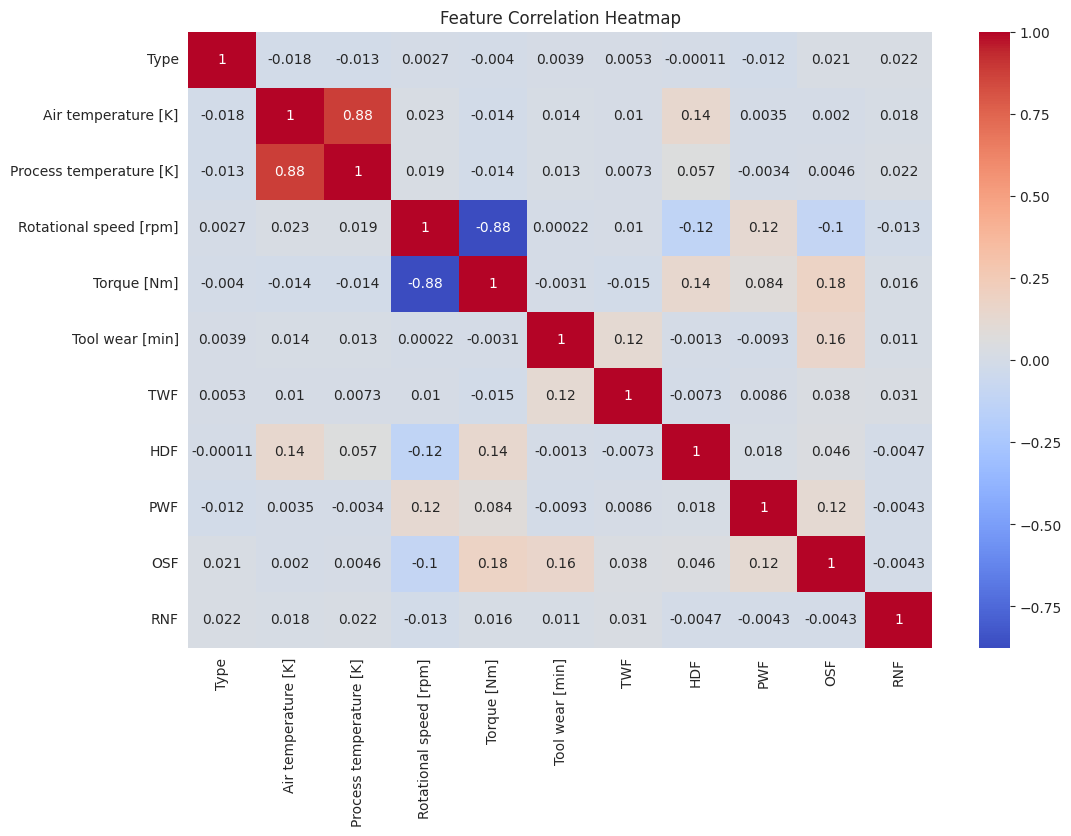

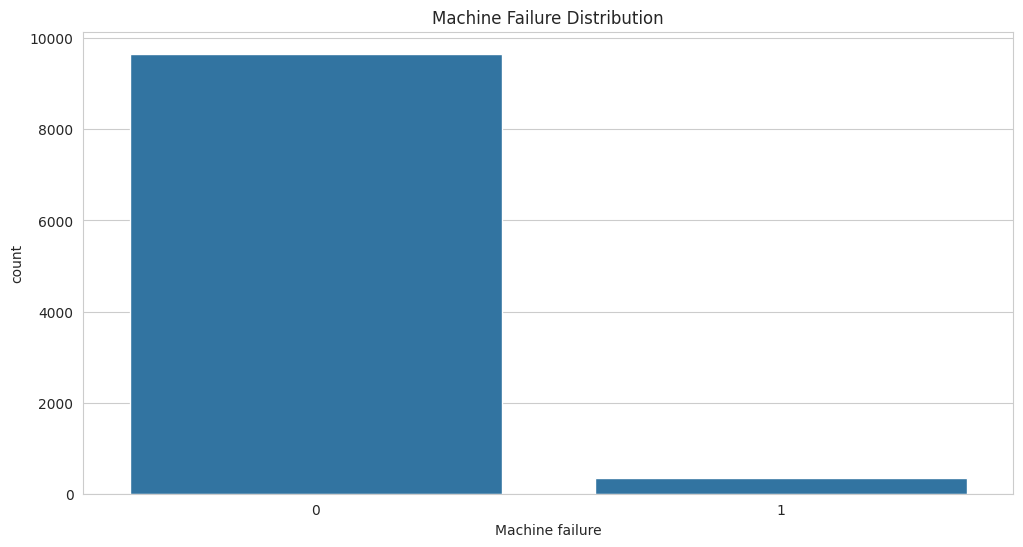

In [45]:
# Step 6 - EDA

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
# Target distribution
sns.countplot(x=target, data=df)
plt.title("Machine Failure Distribution")
plt.show()

In [46]:
# Step 7 - Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
# Step 8 - Model Training & Evaluation Function

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc:.2f})')
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

--- Random Forest ---
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.9706
F1-Score: 0.9851
ROC-AUC: 0.9912


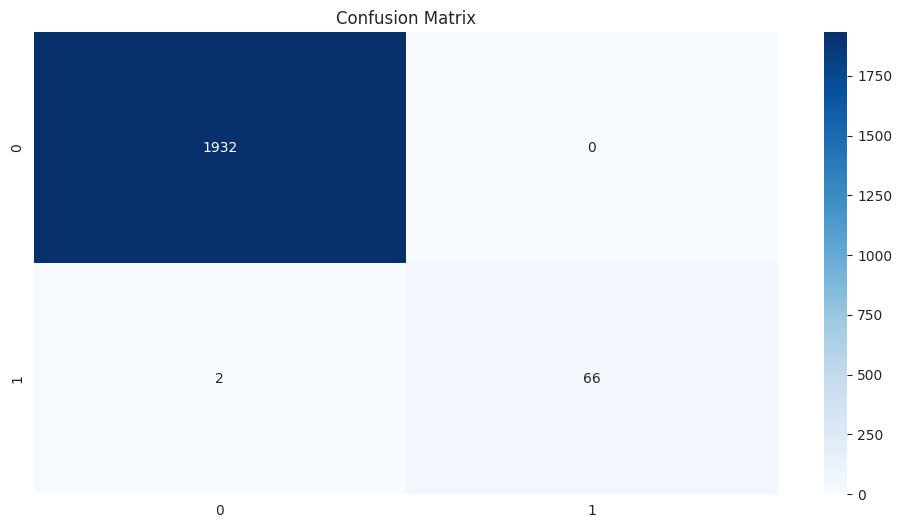

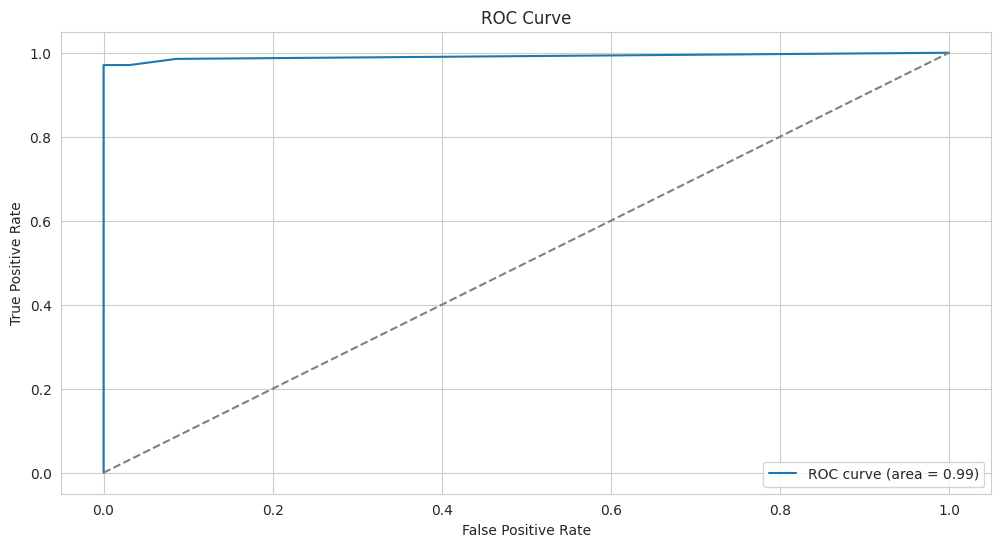

--- XGBoost ---
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.9706
F1-Score: 0.9851
ROC-AUC: 0.9954


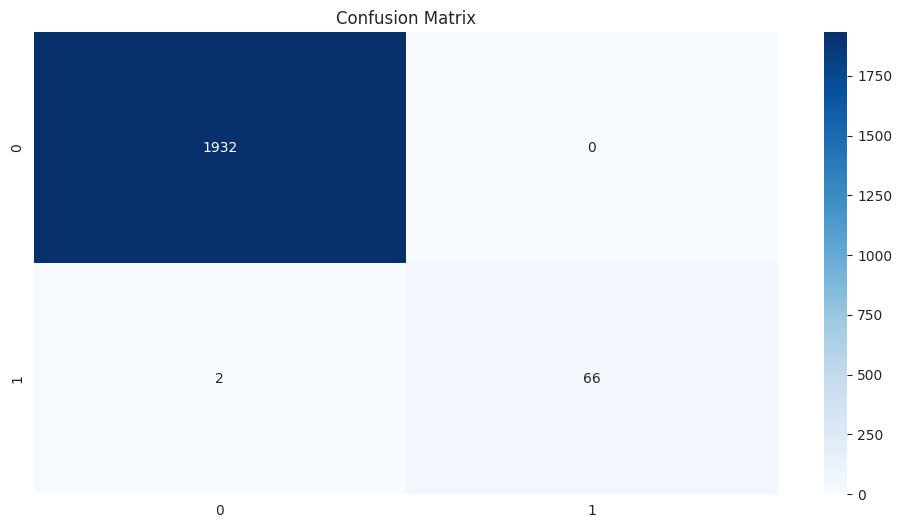

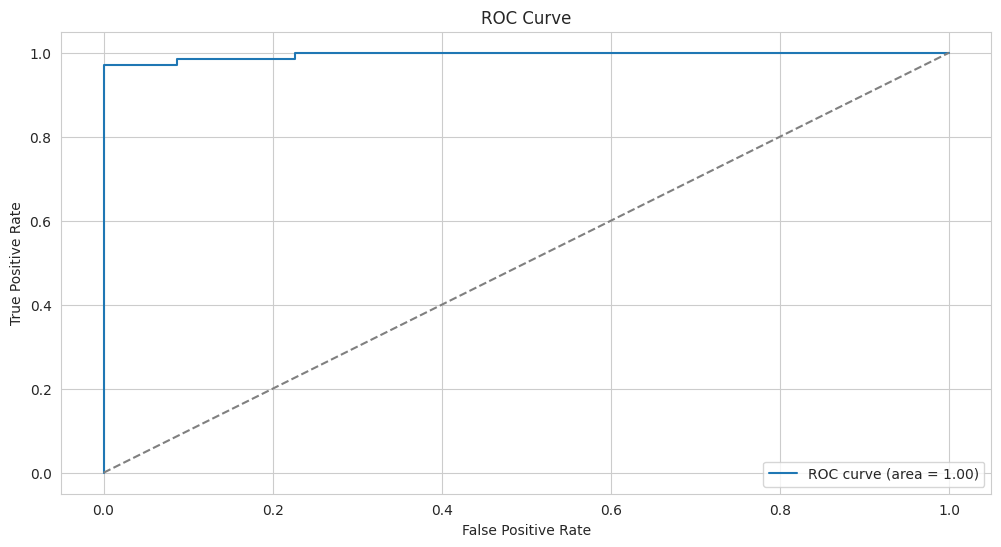

--- LightGBM ---
[LightGBM] [Info] Number of positive: 271, number of negative: 7729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033875 -> initscore=-3.350616
[LightGBM] [Info] Start training from score -3.350616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.9706
F1-Score: 0.9851
ROC-AUC: 0.9923


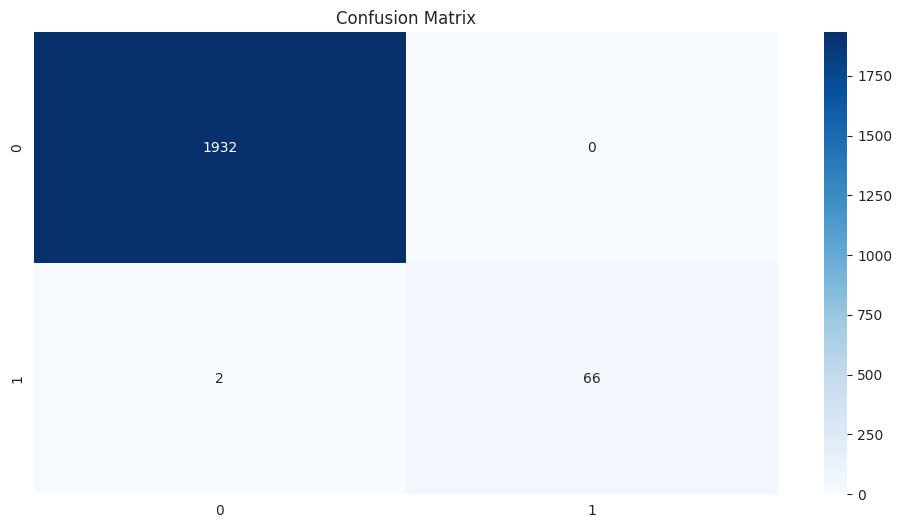

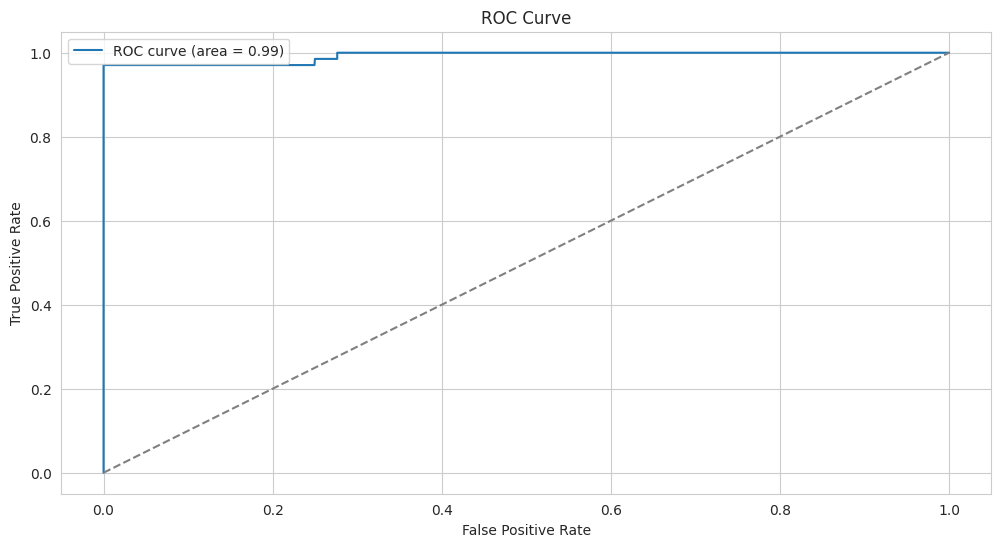

--- SVM ---
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.9706
F1-Score: 0.9851
ROC-AUC: 0.9795


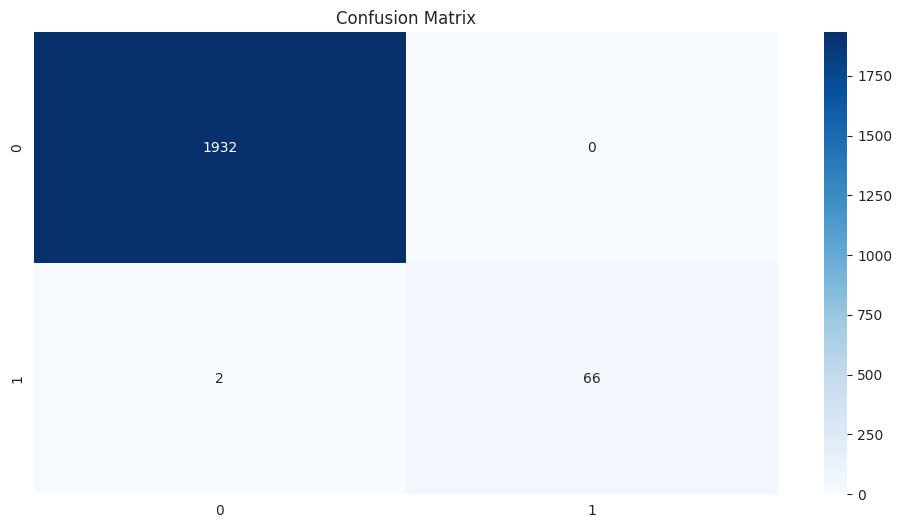

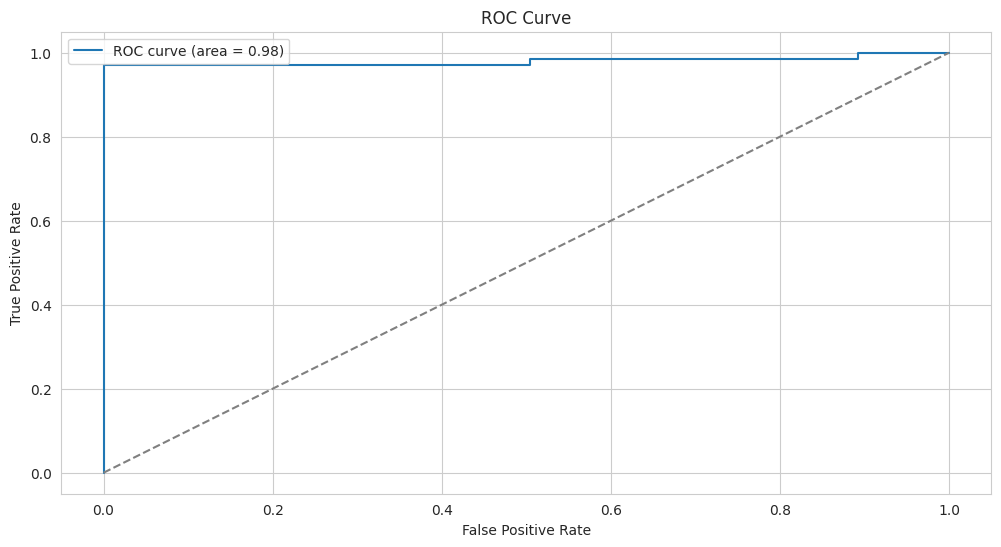

In [48]:
# Step 9 - Train ML Models

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)

NaNs in X_seq: 0
NaNs in y_seq: 0
Class weights: {0: np.float64(0.5175404530744336), 1: np.float64(14.752767527675276)}


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 5, 64)          │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,905 (124.63 KB)

 Trainable params: 31,905 (124.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5811 - loss: 0.6463 - val_accuracy: 0.7075 - val_loss: 0.6198
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7156 - loss: 0.5702 - val_accuracy: 0.7513 - val_loss: 0.6063
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6978 - loss: 0.6288 - val_accuracy: 0.7487 - val_loss: 0.5717
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7297 - loss: 0.5726 - val_accuracy: 0.7887 - val_loss: 0.5158
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7649 - loss: 0.5485 - val_accuracy: 0.7200 - val_loss: 0.5985
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7457 - loss: 0.5557 - val_accuracy: 0.7400 - val_loss: 0.5815
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7682 - loss: 0.5318 - val_accuracy: 0.7850 - val_loss: 0.4885
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7823 - loss: 0.5085 - val_accur

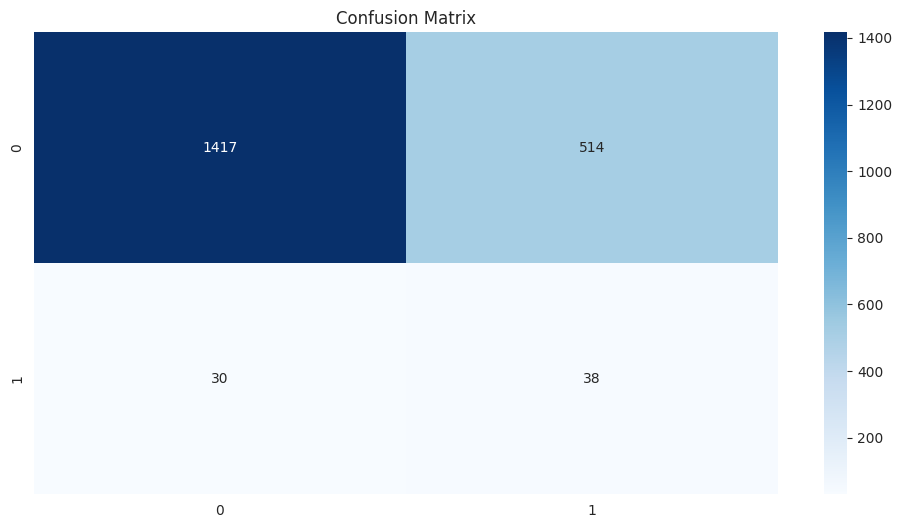

In [61]:
# Step 10 - Advanced LSTM Model Training

!pip install tensorflow --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight
df = pd.read_csv('Dataset.csv')
df = df.drop_duplicates()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df['Type'] = df['Type'].map({'M':0, 'L':1, 'H':2})
target = 'Machine failure'
X = df.drop([target, 'UDI', 'Product ID'], axis=1)
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create Sequences for LSTM
timesteps = 5
X_seq = []
y_seq = []
for i in range(len(X_scaled) - timesteps):
    X_seq.append(X_scaled[i:i+timesteps])
    y_seq.append(y.iloc[i+timesteps])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)
# Check for NaNs
print("NaNs in X_seq:", np.isnan(X_seq).sum())
print("NaNs in y_seq:", np.isnan(y_seq).sum())
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)
# Compute Class Weights for Imbalance
y_train_int = y_train.astype(int)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),
    y=y_train_int
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)
# Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Train Model with Class Weights
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    class_weight=class_weights_dict,
    verbose=1
)
# Evaluate Model with Threshold Tuning
y_pred_prob = model.predict(X_test)
y_pred_prob = np.nan_to_num(y_pred_prob)
threshold = 0.2
y_pred = (y_pred_prob > threshold).astype(int)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [76]:
# Step 11 - Save the Models

import joblib
import tensorflow as tf
# Save classical ML models dictionary and scaler
joblib.dump(models, "models.pkl")
print("✅ Classical ML models saved as models.pkl")
# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")
# Save the LSTM model
model.save("model.keras")
print("✅ LSTM model saved as model.keras")

✅ Classical ML models saved as models.pkl
✅ Scaler saved as scaler.pkl
✅ LSTM model saved as model.keras


In [78]:
# Step 12 - Real-Time Monitoring Simulation

def simulate_real_time_monitoring_classical(sequences, model, scaler, threshold=0.5, method='mean'):
    """
    Simulate real-time streaming for multiple machines using classical ML models.
    sequences: np.array of shape (num_machines, timesteps, num_features) or DataFrame
    model: trained classical ML model with predict_proba
    scaler: fitted StandardScaler
    threshold: probability threshold to trigger alert
    method: how to reduce timesteps -> 'mean', 'max', 'min', or 'flatten'
    """
    # Convert DataFrame to numpy if needed
    if isinstance(sequences, pd.DataFrame):
        sequences = sequences.values
    num_machines = sequences.shape[0]
    # Aggregate / flatten sequences
    if method == 'mean':
        X_input = sequences.mean(axis=1)
    elif method == 'max':
        X_input = sequences.max(axis=1)
    elif method == 'min':
        X_input = sequences.min(axis=1)
    elif method == 'flatten':
        X_input = sequences.reshape(num_machines, -1)
    else:
        raise ValueError("method must be 'mean', 'max', 'min', or 'flatten'")
    # Scale features
    X_scaled = scaler.transform(X_input)
    # Predict probabilities
    probs = model.predict_proba(X_scaled)[:,1]
    # Iterate over machines and print alerts
    for i, prob in enumerate(probs):
        print(f"Machine {i+1}: Failure Probability = {prob:.2f}")
        if prob > threshold:
            print(f"⚠️ ALERT: Potential Machine Failure Detected for Machine {i+1}!\n")
        else:
            print(f"Machine {i+1} operating normally.\n")

# Example usage
simulate_real_time_monitoring_classical(
    X_test[-100:],
    models["Random Forest"],
    scaler,
    threshold=0.5,
    method='mean'
)

Machine 1: Failure Probability = 0.11
Machine 1 operating normally.

Machine 2: Failure Probability = 0.11
Machine 2 operating normally.

Machine 3: Failure Probability = 0.11
Machine 3 operating normally.

Machine 4: Failure Probability = 0.11
Machine 4 operating normally.

Machine 5: Failure Probability = 0.11
Machine 5 operating normally.

Machine 6: Failure Probability = 0.11
Machine 6 operating normally.

Machine 7: Failure Probability = 0.11
Machine 7 operating normally.

Machine 8: Failure Probability = 0.11
Machine 8 operating normally.

Machine 9: Failure Probability = 0.11
Machine 9 operating normally.

Machine 10: Failure Probability = 0.73
⚠️ ALERT: Potential Machine Failure Detected for Machine 10!

Machine 11: Failure Probability = 0.11
Machine 11 operating normally.

Machine 12: Failure Probability = 0.11
Machine 12 operating normally.

Machine 13: Failure Probability = 0.11
Machine 13 operating normally.

Machine 14: Failure Probability = 0.11
Machine 14 operating norma

In [79]:
# Step 13 - Streamlit App Creation

streamlit_app_code = """
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from tensorflow.keras.models import load_model

st.set_page_config(
    page_title='Predictive Maintenance Dashboard',
    layout='wide',
    initial_sidebar_state='expanded'
)

st.markdown(
    \"\"\"
    <h1 style='text-align: center; color: darkblue;'>🛠 Predictive Maintenance Dashboard</h1>
    <p style='text-align: center; color: darkgreen;'>Monitor equipment health, sensor data trends, and potential failures in real-time</p>
    \"\"\", unsafe_allow_html=True
)

# -----------------------------
# Sidebar
# -----------------------------
st.sidebar.header("Settings")
threshold = st.sidebar.slider("Failure Probability Threshold", 0.0, 1.0, 0.5, 0.01)

# -----------------------------
# Load Model, Scaler, and Dataset
# -----------------------------
@st.cache_data
def load_data():
    df = pd.read_csv("Dataset.csv")
    df['Type'] = df['Type'].map({'M':0, 'L':1, 'H':2})
    return df

@st.cache_resource
def load_models():
    models = joblib.load("models.pkl")  # classical ML models
    scaler = joblib.load("scaler.pkl")
    lstm_model = load_model("model.keras")  # LSTM model
    return models, scaler, lstm_model

df = load_data()
models, scaler, lstm_model = load_models()

# -----------------------------
# Dashboard Tabs
# -----------------------------
tab1, tab2, tab3 = st.tabs(["📊 Sensor Trends", "⚡ Machine Failure Probabilities", "🚨 Real-Time Monitoring"])

# -----------------------------
# Tab 1: Sensor Trends
# -----------------------------
with tab1:
    st.subheader("Sensor Trends Over Time")
    sensors = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    selected_sensor = st.selectbox("Select Sensor to Visualize", sensors)

    plt.figure(figsize=(12,4))
    sns.lineplot(data=df[selected_sensor], color='purple')
    plt.title(f"{selected_sensor} Trend")
    plt.xlabel("Samples")
    plt.ylabel(selected_sensor)
    st.pyplot(plt.gcf())
    plt.clf()

# -----------------------------
# Tab 2: Machine Failure Probabilities
# -----------------------------
with tab2:
    st.subheader("Predicted Machine Failure Probabilities")
    model_name = st.selectbox("Select Model", list(models.keys()) + ["LSTM"])

    # Prepare features for classical ML
    X = df.drop(['Machine failure', 'UDI', 'Product ID'], axis=1)

    if model_name != "LSTM":
        X_scaled = scaler.transform(X)
        probs = models[model_name].predict_proba(X_scaled)[:,1]
    else:
        # Create sequences for LSTM (timesteps=5)
        timesteps = 5
        X_scaled = scaler.transform(X)
        X_seq = []
        for i in range(len(X_scaled)-timesteps):
            X_seq.append(X_scaled[i:i+timesteps])
        X_seq = np.array(X_seq)
        probs = lstm_model.predict(X_seq)
        # Pad with zeros for first timesteps
        probs = np.concatenate((np.zeros(timesteps), probs.flatten()))

    df_probs = pd.DataFrame({
        'Machine': df['UDI'],
        'Failure Probability': probs,
        'Status': ['⚠️ At Risk' if p > threshold else '✅ Normal' for p in probs]
    })

    st.dataframe(df_probs.style.applymap(lambda x: 'color: red;' if x=='⚠️ At Risk' else 'color: green;', subset=['Status']))

    # Plot probabilities
    plt.figure(figsize=(12,5))
    sns.barplot(x='Machine', y='Failure Probability', data=df_probs, palette='coolwarm')
    plt.xticks(rotation=90)
    plt.axhline(y=threshold, color='red', linestyle='--', label='Alert Threshold')
    plt.legend()
    st.pyplot(plt.gcf())
    plt.clf()

# -----------------------------
# Tab 3: Real-Time Monitoring Simulation
# -----------------------------
with tab3:
    st.subheader("Simulate Real-Time Sensor Stream")
    num_samples = st.slider("Number of Samples to Stream", 1, 50, 10)
    model_name_rt = st.selectbox("Select Model for Simulation", list(models.keys()) + ["LSTM"], key='sim_model')
    simulate_button = st.button("Start Simulation")

    if simulate_button:
        st.info("Starting real-time monitoring simulation...")
        for i in range(num_samples):
            row = X.sample(1)
            if model_name_rt != "LSTM":
                prob = models[model_name_rt].predict_proba(scaler.transform(row))[0][1]
            else:
                # LSTM requires sequence, replicate last timesteps
                timesteps = 5
                last_rows = X_scaled[-timesteps:]  # last timesteps
                seq = np.vstack([last_rows, scaler.transform(row)])
                seq = seq[-timesteps:].reshape(1, timesteps, X.shape[1])
                prob = lstm_model.predict(seq)[0][0]

            status = "⚠️ At Risk" if prob > threshold else "✅ Normal"
            st.write(f"Sample {i+1}: Failure Probability = {prob:.2f} → {status}")
            time.sleep(0.5)
"""
# Save as app.py
with open("app.py", "w") as f:
    f.write(streamlit_app_code)
print("✅ Streamlit app saved as app.py with all models integrated")

✅ Streamlit app saved as app.py with all models integrated


In [80]:
# Step 14 - Streamlit App Deployment

!pip install -q streamlit pyngrok
import os
import time
from pyngrok import ngrok, conf
# Configure Ngrok Authentication
NGROK_AUTH_TOKEN = "2z0Oqv0tD166fELGCHwV2gLZwq1_2G2zUQRSs6C27k9vdzxwq"
conf.get_default().auth_token = NGROK_AUTH_TOKEN
# Create logs directory
LOG_DIR = "/content/logs"
os.makedirs(LOG_DIR, exist_ok=True)
# Kill any existing Streamlit processes
!pkill -f streamlit
# Run Streamlit app in background
import subprocess
streamlit_command = [
    "streamlit", "run", "app.py",
    "--server.port", "8501",
    "--server.address", "0.0.0.0"
]
with open(f"{LOG_DIR}/app_log.txt", "w") as log_file:
    process = subprocess.Popen(streamlit_command, stdout=log_file, stderr=log_file)
# Give Streamlit some time to start
time.sleep(10)
# Connect Ngrok to the running Streamlit app
public_url = ngrok.connect(addr=8501)
print("🚀 Your Streamlit app is live at:", public_url)

🚀 Your Streamlit app is live at: NgrokTunnel: "https://8c9fc67fdfae.ngrok-free.app" -> "http://localhost:8501"
